In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ds=pd.read_csv('BankNote_Authentication.csv')

In [3]:
ds.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### class is our output or target variable and

### all the others are our input variables

In [4]:
x=ds.drop(['class'],axis=1)
y=ds[['class']]

In [5]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [6]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

#### spliting the data into train and test 

#### and for spliting it is 80-20 ratio 

#### so 80% is training data and 20% is test data

#### also used random_state=0 for suffling the data before spliting

In [9]:
x_train.head()

,variance,skewness,curtosis,entropy
859,-5.8730,9.1752,-0.27448,-6.04220
952,-1.2846,3.2715,-1.76710,-3.26080
1144,-1.3995,-1.9162,2.51540,0.59912
628,3.5251,0.7201,1.69280,0.64438
606,-1.4275,11.8797,0.41613,-6.99780


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Input

### here we are bulding a ANN model with help of keras

### and here we used sigmoid AF function 

In [11]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='sigmoid',input_dim=4))
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
model=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
14/14 [==============================] - 13s 41ms/step - loss: 0.6474 - accuracy: 0.5770 - val_loss: 0.6038 - val_accuracy: 0.6220
Epoch 2/50
14/14 [==============================] - 0s 14ms/step - loss: 0.6409 - accuracy: 0.5605 - val_loss: 0.5926 - val_accuracy: 0.6284
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.6353 - accuracy: 0.5350 - val_loss: 0.5816 - val_accuracy: 0.6330
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 0.6321 - accuracy: 0.5291 - val_loss: 0.5716 - val_accuracy: 0.6594
Epoch 5/50
14/14 [==============================] - 0s 14ms/step - loss: 0.5909 - accuracy: 0.6420 - val_loss: 0.5622 - val_accuracy: 0.7004
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.6406 - val_loss: 0.5532 - val_accuracy: 0.7277
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.5669 - accuracy: 0.7144 - val_loss: 0.5446 - val_accuracy: 0.7550
Epoch 8/50
14/1

In [14]:
y_pred=classifier.predict(x_test)

In [15]:
y_pred=(y_pred>0.5)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[600,  17],
       [ 40, 441]])

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.939297124600639

### for sigmoid AF our f1_score is 0.93

In [75]:
sigmoid_perams=classifier.get_weights()
sigmoid_perams

[array([[-0.727551  ,  1.0110674 ,  1.0748235 , -1.713752  ,  0.75462925,
         -0.7776416 ],
        [ 1.1734166 ,  0.7572696 ,  0.84296536,  0.46578994,  0.80638367,
          0.8418931 ],
        [-1.1521983 ,  0.71976084,  0.29917565,  0.6079191 ,  0.7425877 ,
          0.2065474 ],
        [ 0.22038954,  0.55757034,  0.86272144, -0.06123984,  0.62624973,
          0.51388747]], dtype=float32),
 array([ 0.07694181, -0.6323891 , -0.52814794,  0.37497193, -0.9197095 ,
        -0.5231501 ], dtype=float32),
 array([[ 0.15977626],
        [-1.3581755 ],
        [-0.30170557],
        [ 1.1094419 ],
        [-0.55303615],
        [-0.4599137 ]], dtype=float32),
 array([0.371618], dtype=float32)]

### these are all the values of weights after trining with respect to sigmoid AF.

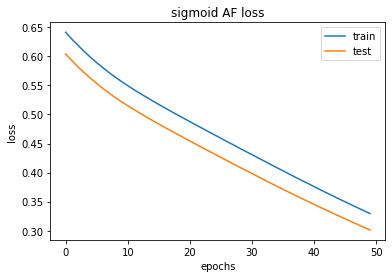

In [68]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('sigmoid AF loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

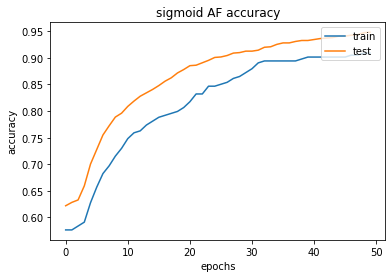

In [72]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('sigmoid AF accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

### Now we wil use relu AF(activation function) 

In [22]:
classifier1=Sequential()
classifier1.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=4))
classifier1.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
classifier1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1=classifier1.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 28ms/step - loss: 1.1508 - accuracy: 0.4827 - val_loss: 1.0772 - val_accuracy: 0.4772
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.9395 - accuracy: 0.5449 - val_loss: 0.9678 - val_accuracy: 0.5301
Epoch 3/50
14/14 [==============================] - 0s 14ms/step - loss: 0.9161 - accuracy: 0.5386 - val_loss: 0.8762 - val_accuracy: 0.5592
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7646 - accuracy: 0.5775 - val_loss: 0.7974 - val_accuracy: 0.5856
Epoch 5/50
14/14 [==============================] - 0s 15ms/step - loss: 0.7706 - accuracy: 0.5919 - val_loss: 0.7288 - val_accuracy: 0.6230
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.6557 - val_loss: 0.6682 - val_accuracy: 0.6585
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.6923 - accuracy: 0.6562 - val_loss: 0.6111 - val_accuracy: 0.6931
Epoch 8/50
14/14

In [25]:
y_pred1=classifier1.predict(x_test)

In [26]:
y_pred1=(y_pred1>0.5)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred1)

0.9793814432989691

### for relu AF our f1_score is 0.97

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[603,  14],
       [  6, 475]])

In [76]:
relu_perams=classifier1.get_weights()
relu_perams

[array([[ 1.3768551 ,  0.00308583, -0.8659246 , -0.43750525, -1.4536597 ,
          0.73783296],
        [ 0.53759205,  0.6392634 , -0.32576174,  0.600046  , -0.32353482,
          0.21813026],
        [ 0.4843226 ,  1.0928947 ,  0.17274515, -0.34537467, -0.68184996,
          0.7057975 ],
        [-0.2729887 , -0.8192063 ,  0.5271092 , -0.30849475, -1.314877  ,
          0.1160277 ]], dtype=float32),
 array([ 0.17036338, -0.00854066,  0.32795438,  0.44088927,  0.51211274,
        -0.25051948], dtype=float32),
 array([[-0.6589834 ],
        [-0.57766885],
        [ 0.9129556 ],
        [ 0.44904655],
        [ 0.25865123],
        [ 0.2975463 ]], dtype=float32),
 array([0.28592148], dtype=float32)]

### these are all the values of weights after trining with respect to relu AF.

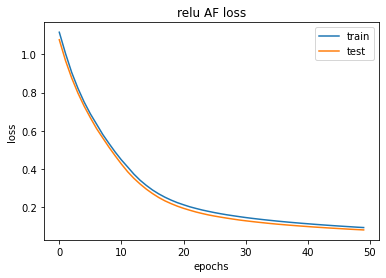

In [69]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('relu AF loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

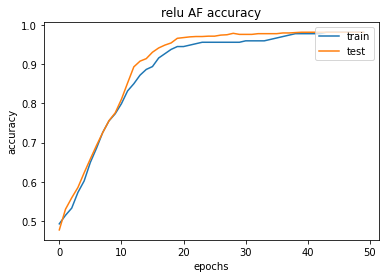

In [71]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('relu AF accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

### Now we wil use elu AF(activation function) 

In [78]:
classifier4=Sequential()
classifier4.add(Dense(units=6,kernel_initializer='he_uniform',activation='elu',input_dim=4))
classifier4.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [79]:
classifier4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [80]:
model4=classifier4.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 22ms/step - loss: 3.6487 - accuracy: 0.6599 - val_loss: 3.3625 - val_accuracy: 0.6621
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 2.8954 - accuracy: 0.6609 - val_loss: 3.2146 - val_accuracy: 0.6712
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 2.3685 - accuracy: 0.6729 - val_loss: 3.0719 - val_accuracy: 0.6749
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 2.9469 - accuracy: 0.6247 - val_loss: 2.9257 - val_accuracy: 0.6767
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 2.4910 - accuracy: 0.6899 - val_loss: 2.7876 - val_accuracy: 0.6803
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 2.6005 - accuracy: 0.6732 - val_loss: 2.6562 - val_accuracy: 0.6849
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 2.4182 - accuracy: 0.6968 - val_loss: 2.5300 - val_accuracy: 0.6922
Epoch 8/50
14/14 

In [83]:
y_pred4=classifier4.predict(x_test)
y_pred4=(y_pred4>0.5)

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred4)

0.9173913043478261

### for elu AF our f1_score is 0.91

In [85]:
elu_params=classifier4.get_weights()
elu_params

[array([[ 1.2224389 ,  0.71039224,  1.2657377 ,  0.95135164,  0.4424655 ,
         -0.6687784 ],
        [-0.5103669 ,  1.0196567 ,  0.35500175,  0.12084213, -0.8693794 ,
         -0.23886406],
        [ 0.0868571 ,  0.76495177,  0.4328991 ,  0.15187958, -1.0487573 ,
          0.09509474],
        [ 0.5947032 ,  0.77011406, -0.6790226 ,  0.51383156,  0.94432163,
         -0.38302845]], dtype=float32),
 array([-0.48272103, -0.681094  , -0.5689037 , -0.49541366, -0.604844  ,
        -0.43739516], dtype=float32),
 array([[-0.5348898 ],
        [-0.58948344],
        [-0.7179061 ],
        [-0.9553463 ],
        [-0.5275058 ],
        [-0.4434579 ]], dtype=float32),
 array([0.55412793], dtype=float32)]

### these are all the values of weights after trining with respect to elu AF.

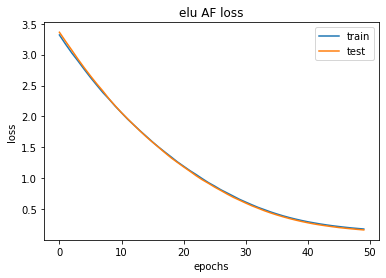

In [86]:
plt.plot(model4.history['loss'])
plt.plot(model4.history['val_loss'])
plt.title('elu AF loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

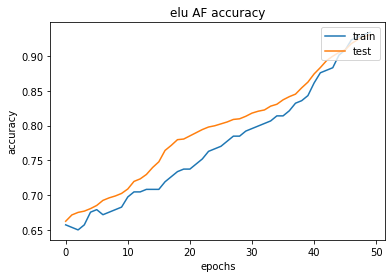

In [87]:
plt.plot(model4.history['accuracy'])
plt.plot(model4.history['val_accuracy'])
plt.title('elu AF accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

### Now we wil use softmax AF(activation function) 

In [31]:
classifier2=Sequential()
classifier2.add(Dense(units=6,kernel_initializer='he_uniform',activation='softmax',input_dim=4))
classifier2.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [32]:
classifier2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2=classifier2.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 23ms/step - loss: 0.7816 - accuracy: 0.3145 - val_loss: 0.7622 - val_accuracy: 0.3734
Epoch 2/50
14/14 [==============================] - 0s 14ms/step - loss: 0.7463 - accuracy: 0.3692 - val_loss: 0.7549 - val_accuracy: 0.3944
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7698 - accuracy: 0.3662 - val_loss: 0.7481 - val_accuracy: 0.4053
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7636 - accuracy: 0.3685 - val_loss: 0.7418 - val_accuracy: 0.4080
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7374 - accuracy: 0.4435 - val_loss: 0.7360 - val_accuracy: 0.4408
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.7415 - accuracy: 0.4649 - val_loss: 0.7306 - val_accuracy: 0.5610
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7532 - accuracy: 0.5259 - val_loss: 0.7254 - val_accuracy: 0.5865
Epoch 8/50
14/14 

In [34]:
y_pred2=classifier2.predict(x_test)

In [35]:
y_pred2=(y_pred2>0.5)

In [94]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred2)

0.9769874476987448

### for softmax AF our f1_score is 0.97

In [77]:
softmax_params=classifier2.get_weights()
softmax_params

[array([[-0.57925314,  0.9806644 , -0.25715953,  0.8864646 , -0.74852353,
          1.0233634 ],
        [-1.1680707 ,  0.22988212, -0.6035136 , -0.77223015, -0.09614992,
         -0.6420772 ],
        [ 0.5217591 ,  0.2294191 ,  0.05060607, -0.76537377, -0.10170969,
          0.99775875],
        [ 1.5210506 ,  0.32449645,  0.65631354,  0.47558528,  0.81187147,
          0.87380457]], dtype=float32),
 array([ 0.6376797 , -0.3133791 , -0.39771545, -0.06817323,  0.4102873 ,
        -0.16417679], dtype=float32),
 array([[ 1.0930407 ],
        [-0.553834  ],
        [-0.04473143],
        [ 0.48984605],
        [ 0.8823267 ],
        [-0.8665128 ]], dtype=float32),
 array([-0.03479763], dtype=float32)]

### these are all the values of weights after trining with respect to softmax AF.

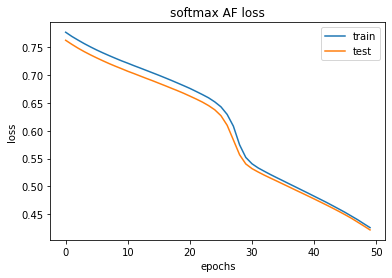

In [70]:
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('softmax AF loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

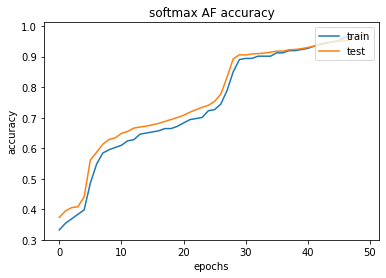

In [73]:
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('softmax AF accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

### Now we wil use swish AF(activation function) 

In [88]:
classifier3=Sequential()
classifier3.add(Dense(units=6,kernel_initializer='he_uniform',activation='swish',input_dim=4))
classifier3.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [90]:
classifier3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [91]:
model3=classifier3.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 23ms/step - loss: 1.7071 - accuracy: 0.4440 - val_loss: 1.6754 - val_accuracy: 0.4508
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 1.4824 - accuracy: 0.5265 - val_loss: 1.5380 - val_accuracy: 0.4699
Epoch 3/50
14/14 [==============================] - 0s 14ms/step - loss: 1.4890 - accuracy: 0.4910 - val_loss: 1.4036 - val_accuracy: 0.4927
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 1.2094 - accuracy: 0.5232 - val_loss: 1.2889 - val_accuracy: 0.5282
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 1.0530 - accuracy: 0.5616 - val_loss: 1.1826 - val_accuracy: 0.5492
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 1.0323 - accuracy: 0.5641 - val_loss: 1.0819 - val_accuracy: 0.5774
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.9600 - accuracy: 0.5453 - val_loss: 0.9878 - val_accuracy: 0.6020
Epoch 8/50
14/

In [93]:
y_pred3=classifier3.predict(x_test)
y_pred3=(y_pred3>0.5)

In [95]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred3)

0.9511677282377919

### for swish AF our f1_score is 0.95

In [96]:
swish_params=classifier3.get_weights()
swish_params

[array([[ 0.9685192 ,  0.78826845, -1.4242569 ,  1.2338135 ,  1.4769297 ,
         -0.85762054],
        [-0.66248995,  0.31239134,  0.02601285,  1.0860014 , -0.0592674 ,
         -0.6391935 ],
        [ 0.7188899 ,  0.4410252 ,  0.63561517,  1.3219805 , -0.11183289,
          0.18353309],
        [-1.1967456 ,  1.0978327 ,  0.986028  ,  0.07442931,  0.9085045 ,
         -1.3619286 ]], dtype=float32),
 array([-0.07753102, -0.1967963 , -0.01776027,  0.24320383, -0.03119492,
         0.09408221], dtype=float32),
 array([[-0.1383626 ],
        [ 0.29512545],
        [ 0.33945733],
        [-0.4071168 ],
        [-0.21108599],
        [ 0.34270564]], dtype=float32),
 array([0.14362298], dtype=float32)]

### these are all the values of weights after trining with respect to swish AF.

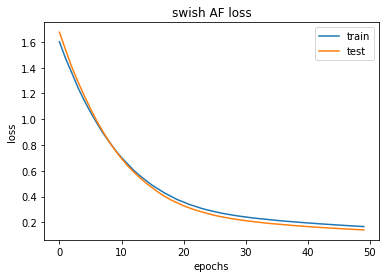

In [97]:
plt.plot(model3.history['loss'])
plt.plot(model3.history['val_loss'])
plt.title('swish AF loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

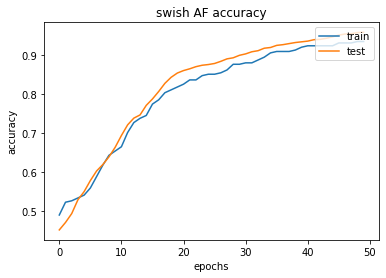

In [98]:
plt.plot(model3.history['accuracy'])
plt.plot(model3.history['val_accuracy'])
plt.title('swish AF accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()